In [4]:
#!pip install cmake

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 MB 9.2 MB/s eta 0:00:00:00:0100:01


In [5]:
#!pip install dlib

  Using cached dlib-19.24.0.tar.gz (3.2 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [2091 lines of output]
      running bdist_wheel
      running build
      running build_py
      package init file 'tools/python/dlib/__init__.py' not found (or not a regular file)
      running build_ext
      Building extension for Python 3.7.9 (default, Aug 31 2020, 07:22:35)
      Invoking CMake setup: 'cmake /private/var/folders/lb/m5ps_m_950d0m02f4_w0xnb80000gn/T/pip-install-p_uy3mow/dlib_5ea4d60ebe58456f84b10dec8a41cac3/tools/python -DCMAKE_LIBRARY_OUTPUT_DIRECTORY=/private/var/folders/lb/m5ps_m_950d0m02f4_w0xnb80000gn/T/pip-install-p_uy3mow/dlib_5ea4d60ebe58456f84b10dec8a41cac3/build/lib.macosx-10.9-x86_64-3.7 -DPYTHON_EXECUTABLE=/Users/administrator/opt/anaconda3/bin/python -DCMAKE_BUILD_TYPE=Release'
      -- The C compiler identification is AppleClang 13.1.6.13160021
   

      /private/var/folders/lb/m5ps_m_950d0m02f4_w0xnb80000gn/T/pip-install-p_uy3mow/dlib_5ea4d60ebe58456f84b10dec8a41cac3/dlib/external/pybind11/include/pybind11/detail/common.h:651:47: note: expanded from macro 'PYBIND11_EXPAND_SIDE_EFFECTS'
      #define PYBIND11_EXPAND_SIDE_EFFECTS(PATTERN) pybind11::detail::expand_side_effects{ ((PATTERN), void(), false)..., false }
                                                    ^                                    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
      /private/var/folders/lb/m5ps_m_950d0m02f4_w0xnb80000gn/T/pip-install-p_uy3mow/dlib_5ea4d60ebe58456f84b10dec8a41cac3/dlib/external/pybind11/include/pybind11/stl_bind.h:383:12: note: in instantiation of function template specialization 'pybind11::class_<std::vector<dlib::mmod_rect>, std::unique_ptr<std::vector<dlib::mmod_rect>>>::class_<pybind11::module_local, char [36]>' requested here
          Class_ cl(scope, name.c_str(), pybind11::module_local(local), std::forward<Args>(args)...);
 

Failed to build dlib
  Running setup.py install for dlib ... done
  DEPRECATION: dlib was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. Discussion can be found at https://github.com/pypa/pip/issues/8368


In [6]:
import dlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load Models
- Bear face network from https://github.com/hypraptive/bearid-models
- Bear landmark network from https://github.com/kairess/dog_face_detector

In [7]:
detector = dlib.cnn_face_detection_model_v1('models/bearface_network.dat')
predictor = dlib.shape_predictor('models/landmarkDetector.dat')

# Load Image

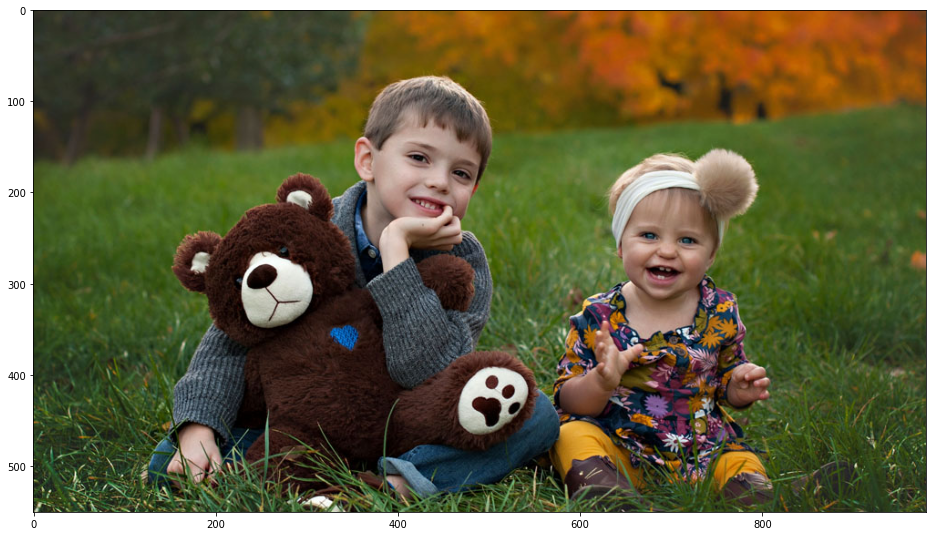

In [28]:
img = dlib.load_rgb_image('imgs/12.jpeg')
img_result = img.copy()

plt.figure(figsize=(16, 10))
plt.imshow(img)

# Prediction

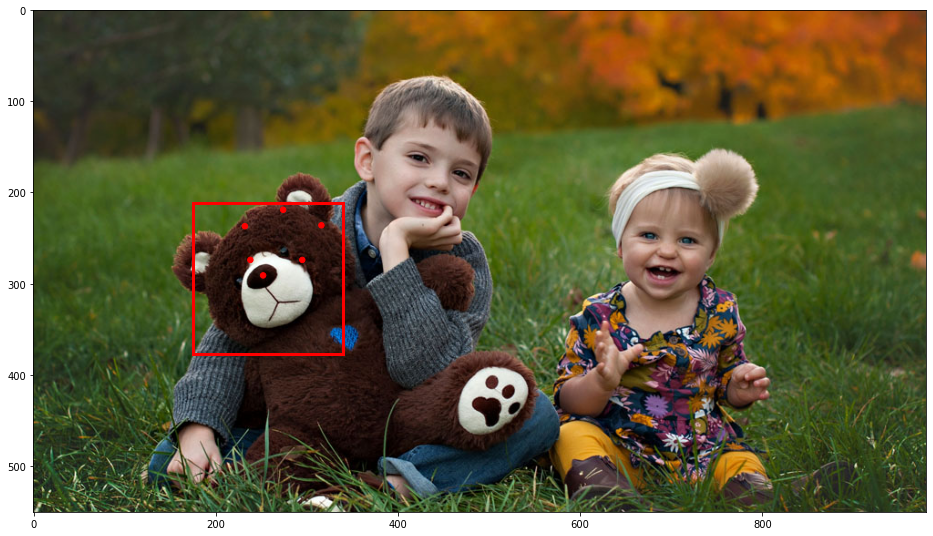

In [29]:
dets = detector(img)

fig, ax = plt.subplots(1, figsize=(16, 10))

for det in dets:
    x, y, w, h = det.rect.left(), det.rect.top(), det.rect.width(), det.rect.height()

    rect = patches.Rectangle((x, y), w, h, linewidth=3, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    
    shape = predictor(img, det.rect)

    for point in shape.parts():
        circle = patches.Circle((point.x, point.y), radius=3, edgecolor='r', facecolor='r')
        ax.add_patch(circle)

ax.imshow(img_result)

# Multiple Images

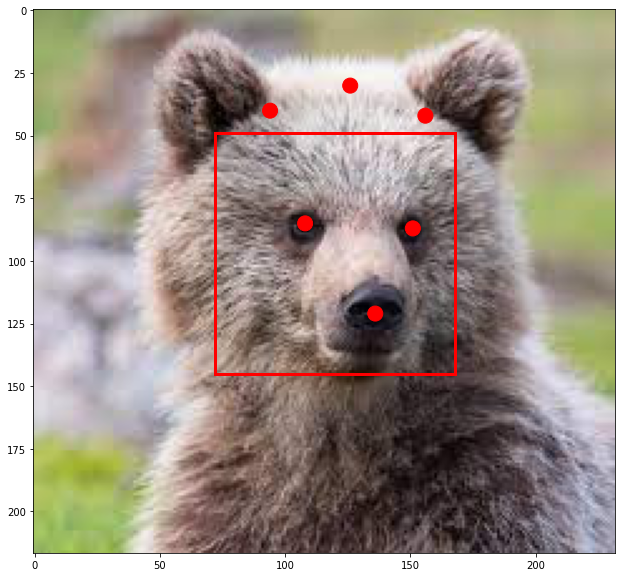

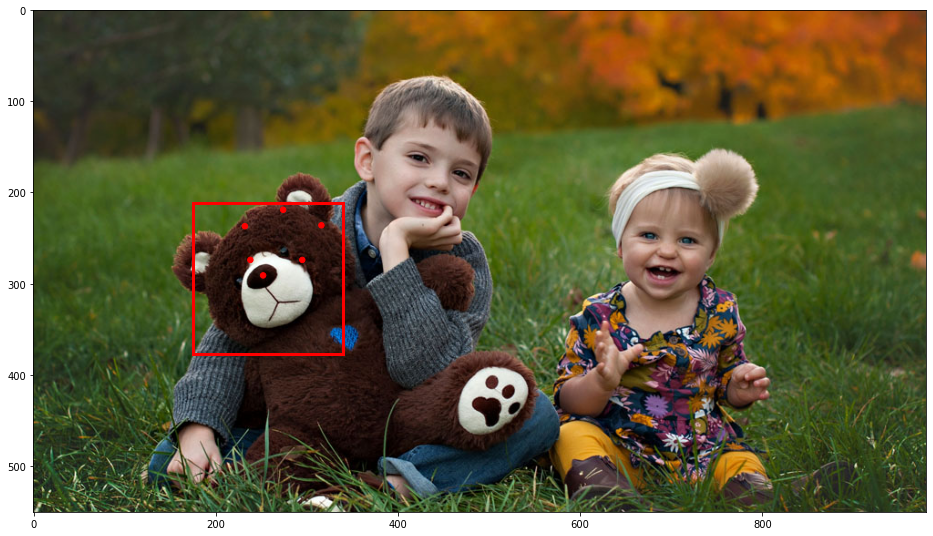

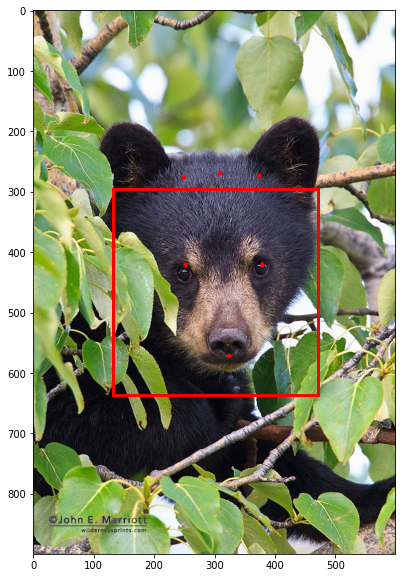

In [27]:
from glob import glob

for img_path in glob('imgs/*.jpeg'):
    img = dlib.load_rgb_image(img_path)
    img_result = img.copy()

    dets = detector(img)

    fig, ax = plt.subplots(1, figsize=(16, 10))

    for det in dets:
        x, y, w, h = det.rect.left(), det.rect.top(), det.rect.width(), det.rect.height()

        rect = patches.Rectangle((x, y), w, h, linewidth=3, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        shape = predictor(img, det.rect)

        for point in shape.parts():
            circle = patches.Circle((point.x, point.y), radius=3, edgecolor='r', facecolor='r')
            ax.add_patch(circle)

    ax.imshow(img_result)

# Put Glasses On

In [13]:
#!pip install imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=b2f1a3ed926e8c03169f26fd10fe0a63ecd96e4d5e0a806fd20f58dec41136f0
  Stored in directory: /Users/administrator/Library/Caches/pip/wheels/86/d7/0a/4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils


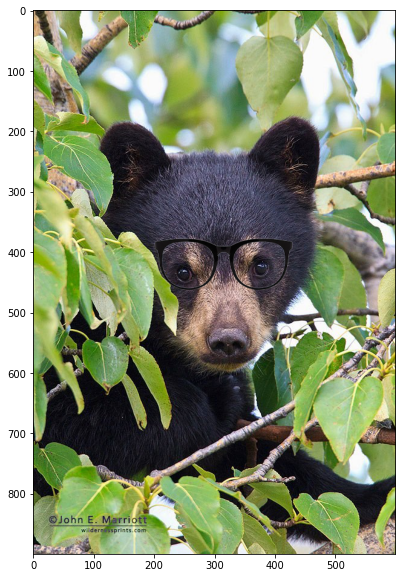

In [32]:
import numpy as np
import cv2
from imutils import face_utils
from math import atan2, degrees

img = dlib.load_rgb_image('imgs/13.jpeg')
img_result = cv2.cvtColor(img.copy(), cv2.COLOR_RGB2RGBA)
glasses = cv2.imread('imgs/glasses.png', cv2.IMREAD_UNCHANGED)
glasses = cv2.cvtColor(glasses, cv2.COLOR_RGB2RGBA)

dets = detector(img)

fig, ax = plt.subplots(1, figsize=(16, 10))

for det in dets:
    x, y, w, h = det.rect.left(), det.rect.top(), det.rect.width(), det.rect.height()
    
    shape = predictor(img, det.rect)
    shape_np = face_utils.shape_to_np(shape)
    
    glasses_center = np.mean([shape_np[5], shape_np[2]], axis=0).astype(int)
    glasses_size = int(np.linalg.norm(shape_np[5] - shape_np[2]) * 1.8)
    
    glasses_resized = cv2.resize(glasses.copy(), dsize=(glasses_size, glasses_size))

    def angle_between(p1, p2):
        xDiff = p2[0] - p1[0]
        yDiff = p2[1] - p1[1]
        return degrees(atan2(yDiff, xDiff))

    angle = -angle_between(shape_np[5], shape_np[2])
    M = cv2.getRotationMatrix2D((glasses_resized.shape[1] / 2, glasses_resized.shape[0] / 2), angle, 1)
    rotated_glasses = cv2.warpAffine(
        glasses_resized.copy(),
        M,
        (glasses_size, glasses_size),
        flags=cv2.INTER_LINEAR,
        borderMode=cv2.BORDER_CONSTANT,
        borderValue=255
    )
    
    x_offset, y_offset = glasses_center - np.array([rotated_glasses.shape[1] / 2, rotated_glasses.shape[0] / 2], dtype=int)

    y1, y2 = y_offset, y_offset + glasses_size
    x1, x2 = x_offset, x_offset + glasses_size

    alpha_s = rotated_glasses[:, :, 3] / 255.0
    alpha_l = 1.0 - alpha_s

    for c in range(0, 3):
        img_result[y1:y2, x1:x2, c] = (alpha_s * rotated_glasses[:, :, c] + alpha_l * img_result[y1:y2, x1:x2, c])

ax.imshow(img_result)